In [1]:
import numpy as np
import pandas as pd
import os
import pandasql
from pandasql import sqldf
from matplotlib import pyplot as plt
import seaborn as sns
import string
%matplotlib inline
#Just importing everything that I think we might possibly need

In [2]:
pysqldf = lambda q: sqldf(q, globals())

In [3]:
#Importing the data we plan on using
tn_df = pd.read_csv("cleaneddata/tn_movies.csv")
imdb_df = pd.read_csv("cleaneddata/imdb_main_table.csv")

# Q3: Is There a Relationship Between Production Cost and Gross?

In [4]:
relation_df = pd.merge(left=imdb_df[['primary_title','original_title','averagerating','numvotes','genres']]\
                        , right=tn_df, left_on='primary_title', right_on='movie',how='inner')

# This removes the columns with nan for genres and also transforms other values to nice forms
relation_df = relation_df[relation_df['genres'].notna()]
relation_df = relation_df.drop_duplicates(['primary_title','original_title','genres','production_budget'], keep='first')
relation_df['production_budget'] = relation_df['production_budget'].apply(lambda x: x/1000000)
relation_df['domestic_gross'] = relation_df['domestic_gross'].apply(lambda x: x/1000000)
relation_df['worldwide_gross'] = relation_df['worldwide_gross'].apply(lambda x: x/1000000)
relation_df['genres'] = relation_df['genres'].str.split(',')

In [5]:
relation_df.head()

,primary_title,original_title,averagerating,numvotes,genres,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,Foodfight!,1.9,8248,"[Action, Animation, Comedy]",1325,26,2012-12-31,Foodfight!,45.0,0.000000,0.073706
2,The Overnight,The Overnight,6.1,14828,"[Comedy, Mystery]",5620,21,2015-06-19,The Overnight,0.2,1.109808,1.165996
3,On the Road,On the Road,6.1,37886,"[Adventure, Drama, Romance]",2316,17,2013-03-22,On the Road,25.0,0.720828,9.313302
4,On the Road,On the Road,6.0,6,[Drama],2316,17,2013-03-22,On the Road,25.0,0.720828,9.313302
6,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,7.3,275300,"[Adventure, Comedy, Drama]",436,37,2013-12-25,The Secret Life of Walter Mitty,91.0,58.236838,187.861183


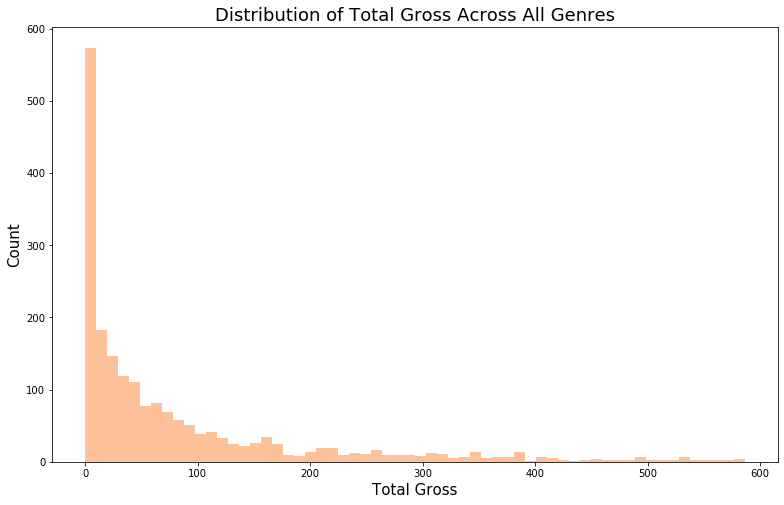

In [16]:
plt.figure(figsize=(13,8))
fig4 = sns.distplot(relation_df[(relation_df['worldwide_gross']<600)&(relation_df['worldwide_gross']>0)]['worldwide_gross']\
                    , bins=60,kde=False, color='#ff6600')



plt.ylabel('Count', size=15)
plt.title("Distribution of Total Gross Across All Genres",size=18)
plt.xlabel('Total Gross',size=15)
plt.show()

In [24]:
# This is the correlation coefficient for production budget to worldwide gross
relation_df['production_budget'].corr(other=relation_df['worldwide_gross'], method='pearson')

0.7832260783632695

<Figure size 1512x936 with 0 Axes>

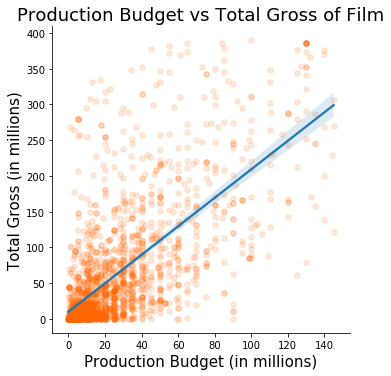

In [35]:
# This plot shows the relationship between production budget and worldwide gross
plt.figure(figsize=(21,13))
fig5 = sns.lmplot(data=relation_df[(relation_df['production_budget']<150)&(relation_df['worldwide_gross']<400)], \
              x='production_budget', y='worldwide_gross', scatter_kws={'alpha':0.15,'s':30, 'color':'#ff6600'})

plt.ylabel('Total Gross (in millions)', size=15)
plt.title("Production Budget vs Total Gross of Film",size=18)
plt.xlabel('Production Budget (in millions)',size=15)
plt.show()

In [26]:
relation_df['rate_of_return']=relation_df['worldwide_gross']/relation_df['production_budget']

In [27]:
relation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2308 entries, 0 to 2321
Data columns (total 13 columns):
primary_title        2308 non-null object
original_title       2308 non-null object
averagerating        2308 non-null float64
numvotes             2308 non-null int64
genres               2308 non-null object
Unnamed: 0           2308 non-null int64
id                   2308 non-null int64
release_date         2308 non-null object
movie                2308 non-null object
production_budget    2308 non-null float64
domestic_gross       2308 non-null float64
worldwide_gross      2308 non-null float64
rate_of_return       2308 non-null float64
dtypes: float64(5), int64(3), object(5)
memory usage: 252.4+ KB


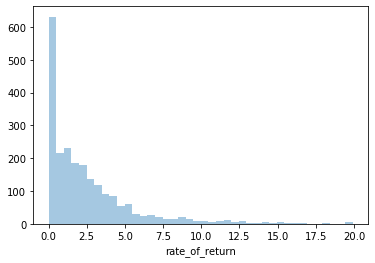

In [28]:
fig6 = sns.distplot(relation_df[relation_df['rate_of_return']<20]['rate_of_return'],bins=40,kde=False)

## Q4: What Genre has the highest rate of return?

Now, let's see which genres are most successful and on average by how much

In [31]:
successful_df = relation_df[relation_df['rate_of_return']>2][['primary_title','genres','rate_of_return']]\
                .explode('genres').groupby('genres').agg(['mean','count','median','std']).reset_index()
successful_df.columns = successful_df.columns.get_level_values(0)
successful_df.columns = ['genres','ror_mean','size','ror_median','deviation']
successful_df = successful_df[successful_df['size']>10]


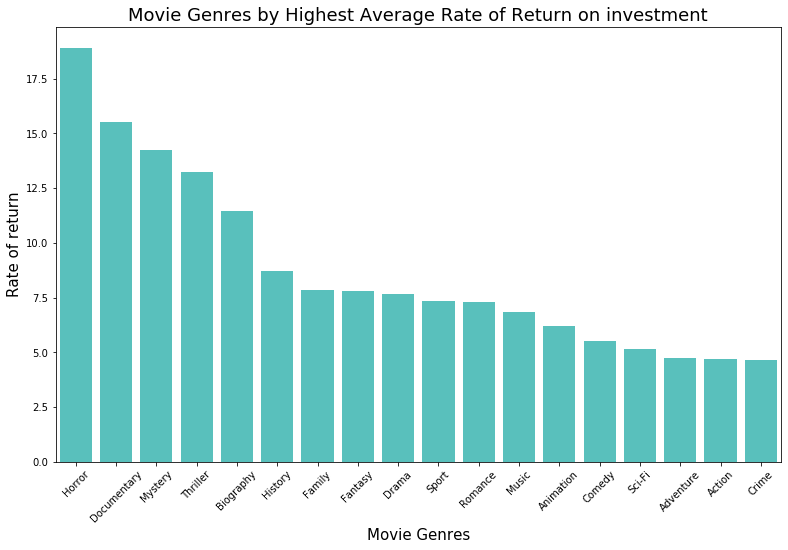

In [32]:
plt.figure(figsize=(13,8))
fig7 = sns.barplot(data=successful_df, x='genres', y='ror_mean',\
            order = successful_df.sort_values('ror_mean' ,ascending=False).genres, color='mediumturquoise')
plt.xlabel('Movie Genres',size=15)
fig7.set_xticklabels(fig7.get_xticklabels(),rotation=45)
plt.ylabel('Rate of return', size=15)
plt.title("Movie Genres by Highest Average Rate of Return on investment",size=18)
plt.show()

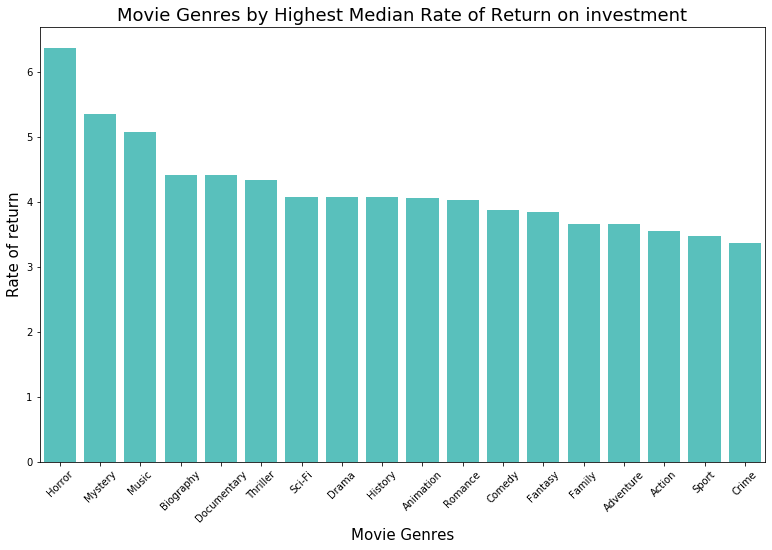

In [33]:
plt.figure(figsize=(13,8))
fig8 = sns.barplot(data=successful_df, x='genres', y='ror_median',\
            order = successful_df.sort_values('ror_median' ,ascending=False).genres,color='mediumturquoise')
plt.xlabel('Movie Genres',size=15)
fig8.set_xticklabels(fig8.get_xticklabels(),rotation=45)
plt.ylabel('Rate of return', size=15)
plt.title("Movie Genres by Highest Median Rate of Return on investment",size=18)
plt.show()

In [34]:
# Size is the count of movies used in the calculations
# Deviation is the standard deviation for the graph
successful_df[['genres','size','deviation']]

,genres,size,deviation
0,Action,282,4.483462
1,Adventure,251,5.987889
2,Animation,80,10.504293
3,Biography,74,37.410608
4,Comedy,343,6.285201
5,Crime,119,5.930503
6,Documentary,30,56.146313
7,Drama,501,12.763748
8,Family,62,14.324584
9,Fantasy,83,12.769966


## The above graphs show us the genres that have the highest rate of return based on the amount of money used to make it.